In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stt
import seaborn as sns
import math

   Suponha que um processo aleatório tenha múltiplos resultados igualmente prováveis, alguns favoráveis ao nosso interesse e outros desfavoráveis. A probabilidade de obtermos um resultado favorável é igual a proporcão entre os resultado favoráveis e o total de resultados.

# Espaço Amostral: resultados equiprováveis do lançamento de dados:

In [2]:
a = np.arange(1,7)
b = np.arange(1,7) + np.arange(1,7)[:,None]
print('Espaço Amostral de 1 dado:')
print(' ')
print(a)
print(' ')
print('Espaço Amostral de 2 dados:')
print(' ')
print(b)

Espaço Amostral de 1 dado:
 
[1 2 3 4 5 6]
 
Espaço Amostral de 2 dados:
 
[[ 2  3  4  5  6  7]
 [ 3  4  5  6  7  8]
 [ 4  5  6  7  8  9]
 [ 5  6  7  8  9 10]
 [ 6  7  8  9 10 11]
 [ 7  8  9 10 11 12]]


* Distribuição de Frequências

In [3]:
dado1 = {'lance': a,
          'dado1': a,
          'result': a * 1}
dado1 = pd.DataFrame(dado1)

In [4]:
dados2 = {'lance': np.arange(1,37),
          'dado1': [1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6,1,2,3,4,5,6],
          'dado2': [1,1,1,1,1,1,2,2,2,2,2,2,3,3,3,3,3,3,4,4,4,4,4,4,5,5,5,5,5,5,6,6,6,6,6,6]}
dados2 = pd.DataFrame(dados2)

dados2['result'] = dados2['dado1'] + dados2['dado2']

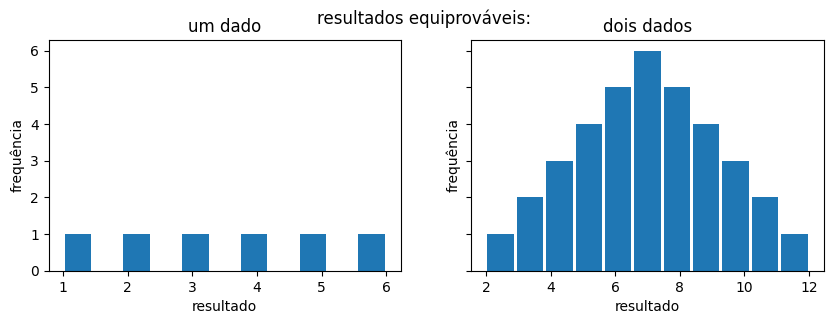

In [5]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=(10,3))
axs[0].hist(dado1['result'], bins=11, rwidth=0.9)
axs[1].hist(dados2['result'], bins=11, rwidth=0.9)
plt.suptitle('resultados equiprováveis:')
axs[0].set_ylabel('frequência')
axs[0].set_xlabel('resultado')
axs[0].title.set_text('um dado')
axs[1].set_ylabel('frequência')
axs[1].set_xlabel('resultado')
axs[1].title.set_text('dois dados')
plt.show()

  A partir do gráfico é possível perceber que, na análise de duas ou mais variáveis, os resultados deixem de ser igualmente prováveis. Eles passam a ter uma distribuição equiprovável que passa a depender das caracteríticas da amostra. (Ver: AASs,AAsc e combinação, etc..).

# Teorema Central do Limite:

Não importa qual a distribuição de probabilidades de uma amostra aleatória, se for possível repeti-la regularmente, com média e desvio padrão conhecidos. É possível aproximar qualquer distribuição de probabilidades, inclusive de formato desconhecido para uma distribuição normal, com média zero e desvio padrão um.

In [6]:
np.random.seed(13)

* Exemplo Amostra Binomial: Considere 420 lançamentos de uma moeda perfeitamente equilibrada.

In [118]:
lançamentos = 420
prob_sucesso = 0.5

* Número de amostras

In [117]:
n_amostra = 1
n_amostras = 30
n_amostras2 = 1000

* geração de resultado aleatórios:

In [8]:
bi_results = np.random.binomial(lançamentos, prob_sucesso, n_amostra)
bi_results2 = np.random.binomial(lançamentos, prob_sucesso, n_amostras)
bi_results3 = np.random.binomial(lançamentos, prob_sucesso, n_amostras2)

* plot:

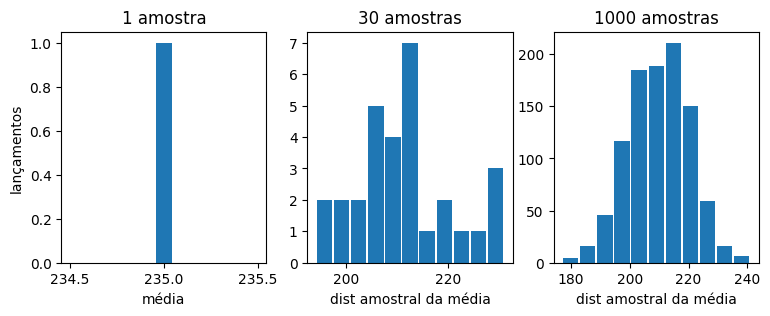

In [9]:
fig , axs = plt.subplots(1,3, figsize=(9,3))

axs[0].hist(bi_results, bins=11, rwidth=0.9)
axs[0].set_ylabel('lançamentos')
axs[0].set_xlabel('média')
axs[0].title.set_text('1 amostra')

axs[1].hist(bi_results2, bins=11, rwidth=0.9)
axs[1].set_xlabel('dist amostral da média')
axs[1].title.set_text('30 amostras')

axs[2].hist(bi_results3, bins=11, rwidth=0.9)
axs[2].set_xlabel('dist amostral da média')
axs[2].title.set_text('1000 amostras')

plt.show()

# Função de tamanho da amostra:



## Média

* z: valor crítico da distribuição.
* sigma: desvio padrão
* e: margem de erro

---

* Definir função:

In [10]:
def t_amostra(z, sigma, e):
  exact = (z * sigma / e)**2
  return math.ceil(exact)

  Deseja-se obter o tamanho de amostra para estimar a média de altura dos alunos da PUCRS.

* ic = 95% (binomial)
* e = 3 cm
* sigma = 15 cm

* Valor crítico tabela z:

In [121]:
z = stt.norm.ppf(0.975)
z

1.959963984540054

* Cálculo:

In [12]:
t_amostra(z, 15, 3)

97

## Proporção

* z: valor crítico da distribuição
* e: erro
* p: proporção (na ausência = 0.5)

---

* Definição da função:

In [13]:
def t_amostra2(z, e, p):
  exact = (z**2 * p * (1 - p)) / e**2
  return math.ceil(exact)

Em uma pesquisa eleitoral deseja-se calcular o tamanho da amostra aproximado.

* ic = 95% (binomial)
* p = 0.5
* e = 2%


* Valor crítico tabela z:

In [122]:
z = stt.norm.ppf(0.975)
z

1.959963984540054

* Cálculo da amostra:

In [15]:
t_amostra2(z, 0.02, 0.5)

2401

# Intervalo de confiança (proporção):

* z: valor crítico de distribuição
* e: erro
* p: proporção
---

In [16]:
def ic(z, p, n):
  exact = z * math.sqrt((p * (1 - p)) / n)
  return exact

  Deseja-se obter o tamanho de amostra para estimar a média de altura dos alunos da PUCRS.

* ic = 95% (binomial)
* p = 20%
* n = 125

* * Valor crítico tabela z:

In [17]:
z = stt.norm.ppf(0.975)
z

1.959963984540054

* Cálculo do erro:

In [123]:
e = ic(z, 0.2, 125) * 100
print('Margem de erro: %', e)

Margem de erro: % 7.012180324612653


* Cálculo do intervalo de confiança:

In [124]:
print('Limite inferior: %', 20 - e)
print('Limite superior: %', 20 + e)

Limite inferior: % 12.987819675387346
Limite superior: % 27.012180324612654


* Gráfico de distribuição de frequências e limites

In [125]:
np.random.seed(10)

* Gerar dados para distribuição dada:

In [126]:
graf = np.random.normal(20, 4.5, 125)

* Transformar em DF:

In [127]:
graf = pd.DataFrame(graf)
graf.rename(columns={0:'fr'}, inplace=True)

* plot:

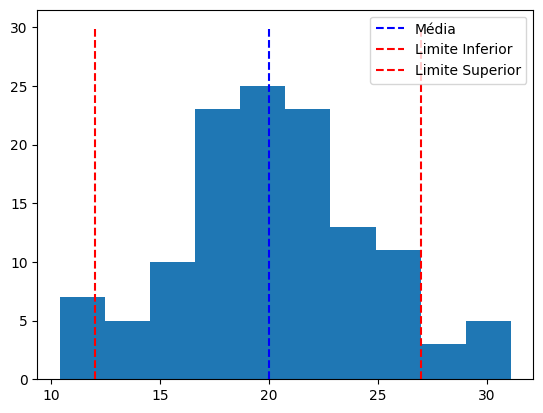

In [128]:
plt.hist(graf['fr'])
plt.plot([20,20], [0, 30], '--', color='b', label='Média')
plt.plot([12,12], [0, 30], '--', color='r', label='Limite Inferior') # Plotting vertical line for li
plt.plot([27,27], [0, 30], '--', color='r', label='Limite Superior') # Plotting vertical line for lf
plt.legend()  # Showing the legend
plt.show()